# 그래디언트 부스팅

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('체질검사.csv', engine = 'python')
df_y = df['FAT']
df_x = df.drop('FAT', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)

In [6]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.981
Score on test set : 0.584


In [10]:
train_score = [];test_score= []
para_n_tree = [n_tree * 10 for n_tree in range(1,15)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.589
6,70,0.963,0.590
7,80,0.970,0.584
8,90,0.976,0.585
9,100,0.981,0.584


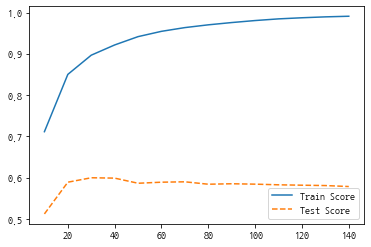

In [9]:
plt.plot(para_n_tree, train_score, linestyle='-', label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle='--', label = "Test Score")
plt.legend()

In [11]:
train_score = [];test_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30,
                                 min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.896715,0.599979
1,2,0.899129,0.596363
2,3,0.896062,0.594561
3,4,0.892703,0.585918
4,5,0.889884,0.604053
5,6,0.887988,0.595692
6,7,0.883890,0.589585
7,8,0.873906,0.610495
8,9,0.878608,0.597833
9,10,0.872687,0.587230


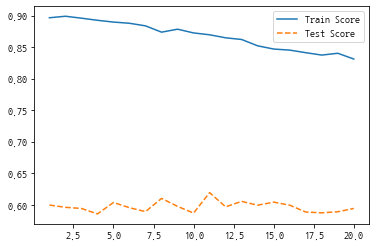

In [12]:
plt.plot(para_leaf, train_score, linestyle='-', label = "Train Score")
plt.plot(para_leaf, test_score, linestyle='--', label = "Test Score")
plt.legend()

In [34]:
train_score = [];test_score= []
para_split = [n_split * 2 for n_split in range(20,70)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30,min_samples_leaf = 11, 
                                 min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,40,0.854,0.617
1,42,0.849,0.615
2,44,0.846,0.614
3,46,0.843,0.618
4,48,0.839,0.614
5,50,0.839,0.614
6,52,0.832,0.621
7,54,0.832,0.621
8,56,0.830,0.619
9,58,0.829,0.622


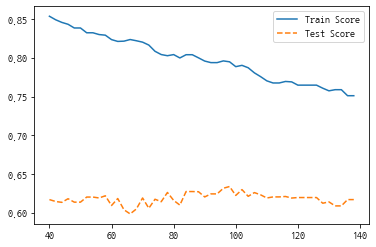

In [36]:
plt.plot(para_split, train_score, linestyle='-', label = "Train Score")
plt.plot(para_split, test_score, linestyle='--', label = "Test Score")
plt.legend()

In [39]:
train_score = [];test_score= []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30, min_samples_leaf = 11, 
                                 min_samples_split = 98, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.703,0.592
1,2,0.768,0.615
2,3,0.795,0.634
3,4,0.792,0.636
4,5,0.797,0.640
5,6,0.799,0.636
6,7,0.799,0.636
7,8,0.799,0.636
8,9,0.799,0.636
9,10,0.799,0.636


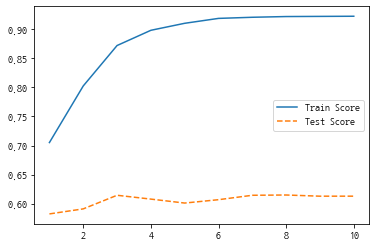

In [28]:
plt.plot(para_depth, train_score, linestyle='-', label = "Train Score")
plt.plot(para_depth, test_score, linestyle='--', label = "Test Score")
plt.legend()

In [40]:
train_score = [];test_score= []
para_lr = [lr*0.01 for lr in range(1,20)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 30, min_samples_leaf = 11, 
                                 min_samples_split = 98, max_depth = 5, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['LearningRate'] = para_lr
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,LearningRate,TrainScore,TestScore
0,0.01,0.249,0.188
1,0.02,0.430,0.362
2,0.03,0.546,0.468
3,0.04,0.624,0.542
4,0.05,0.677,0.585
5,0.06,0.722,0.615
6,0.07,0.746,0.623
7,0.08,0.770,0.638
8,0.09,0.780,0.625
9,0.10,0.797,0.640


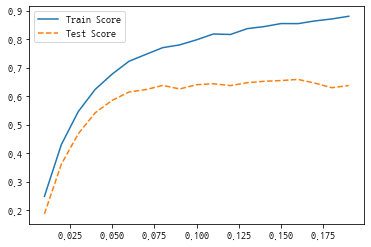

In [41]:
plt.plot(para_lr, train_score, linestyle='-', label = "Train Score")
plt.plot(para_lr, test_score, linestyle='--', label = "Test Score")
plt.legend()

In [43]:
v_feature_name = df_train_x.columns
gb_final = GradientBoostingRegressor(n_estimators = 30, min_samples_leaf = 11, min_samples_split = 98, max_depth = 5,
                                     learning_rate = 0.16,random_state= 1234)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.854
Score on test set: 0.659


## 실습 - 당뇨병 (그래디언트 부스팅)

In [44]:
df = pd.read_csv('DIABETES.csv', engine = 'python')
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [45]:
df_y = df['Y']
df_x = df.drop('Y', axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)

In [62]:
train_score = [];test_score= []
para_n_tree = [n_tree * 1 for n_tree in range(1,40)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
    
df_score_n = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,1,0.098,0.084
1,2,0.179,0.164
2,3,0.246,0.228
3,4,0.302,0.277
4,5,0.348,0.312
5,6,0.390,0.341
6,7,0.425,0.373
7,8,0.456,0.391
8,9,0.481,0.406
9,10,0.504,0.430


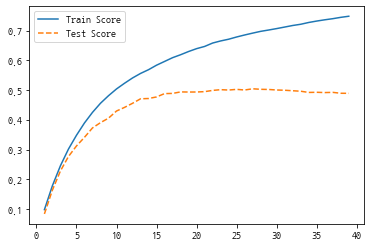

In [63]:
plt.plot(para_n_tree, train_score, linestyle='-', label = "Train Score")
plt.plot(para_n_tree, test_score, linestyle='--', label = "Test Score")
plt.legend()

In [64]:
train_score = [];test_score= []
para_leaf = [n_leaf * 1 for n_leaf in range(1,30)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 27,
                                 min_samples_leaf = v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
    
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score
df_score_leaf

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.691648,0.504558
1,2,0.686431,0.502135
2,3,0.686603,0.509391
3,4,0.685951,0.497689
4,5,0.674213,0.471462
5,6,0.671227,0.493161
6,7,0.667017,0.497014
7,8,0.663770,0.490345
8,9,0.665174,0.499861
9,10,0.669806,0.508183


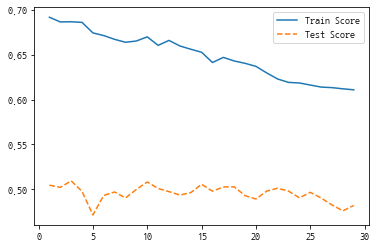

In [65]:
plt.plot(para_leaf, train_score, linestyle='-', label = "Train Score")
plt.plot(para_leaf, test_score, linestyle='--', label = "Test Score")
plt.legend()

In [71]:
train_score = [];test_score= []
para_split = [n_split * 2 for n_split in range(6,30)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 27,min_samples_leaf = 3, 
                                 min_samples_split = v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
    
df_score_split = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,12,0.685,0.512
1,14,0.685,0.512
2,16,0.685,0.512
3,18,0.678,0.515
4,20,0.676,0.507
5,22,0.673,0.509
6,24,0.667,0.505
7,26,0.667,0.505
8,28,0.669,0.510
9,30,0.667,0.510


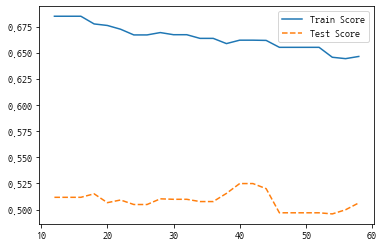

In [72]:
plt.plot(para_split, train_score, linestyle='-', label = "Train Score")
plt.plot(para_split, test_score, linestyle='--', label = "Test Score")
plt.legend()

In [73]:
train_score = [];test_score= []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 27, min_samples_leaf = 3, 
                                 min_samples_split = 40, max_depth = v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.472,0.484
1,2,0.581,0.515
2,3,0.662,0.525
3,4,0.731,0.486
4,5,0.782,0.482
5,6,0.806,0.484
6,7,0.829,0.476
7,8,0.839,0.466
8,9,0.837,0.467
9,10,0.848,0.473


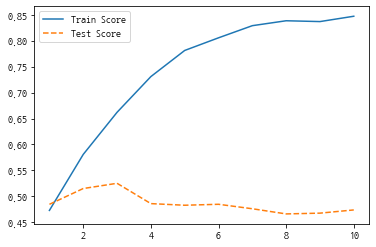

In [74]:
plt.plot(para_depth, train_score, linestyle='-', label = "Train Score")
plt.plot(para_depth, test_score, linestyle='--', label = "Test Score")
plt.legend()

In [75]:
train_score = [];test_score= []
para_lr = [lr*0.01 for lr in range(1,20)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state = 1234, n_estimators = 27, min_samples_leaf = 3, 
                                 min_samples_split = 40, max_depth = 3, learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
    
    
df_score_depth = pd.DataFrame()
df_score_depth['LearningRate'] = para_lr
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score
df_score_depth.round(3)

,LearningRate,TrainScore,TestScore
0,0.01,0.217,0.210
1,0.02,0.351,0.333
2,0.03,0.441,0.401
3,0.04,0.502,0.449
4,0.05,0.545,0.474
5,0.06,0.581,0.499
6,0.07,0.605,0.501
7,0.08,0.626,0.507
8,0.09,0.652,0.519
9,0.10,0.662,0.525


In [77]:
v_feature_name = df_train_x.columns
gb_final = GradientBoostingRegressor(n_estimators = 27, min_samples_leaf = 3, min_samples_split = 40, max_depth = 3,
                                     learning_rate = 0.1,random_state= 1234)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set: 0.662
Score on test set: 0.525


In [78]:
df_importance = pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.441
8,LTG,0.275
3,BP,0.079
9,GLUCOSE,0.076
6,HDL,0.053
5,LDL,0.022
7,TCH,0.019
4,CHOLESTEROL,0.013
1,GENDER,0.012
0,AGE,0.010


Text(0, 0.5, '변수')

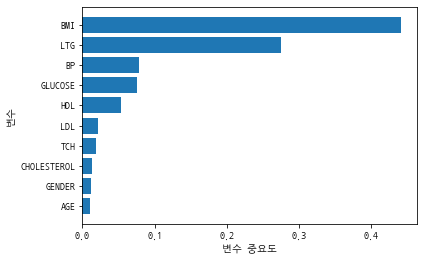

In [79]:
df_importance.sort_values("Importance", ascending = True, inplace =True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# 모델 평가_예측모델

In [140]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [141]:
df = pd.read_csv('체질검사.csv', engine = 'python')
df_y = df['FAT']
df_x = df.drop('FAT', axis = 1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)

In [142]:
lr_model = smf.ols(formula = "FAT~NECK+ABDOMEN+HIP+FOREARM+WRIST", data = df)
lr_result = lr_model.fit()

In [143]:
#Decision Tree
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split = 20, max_depth = 4, random_state= 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [144]:
#RandomForest Tree
rf_final = RandomForestRegressor(n_estimators = 130, min_samples_leaf = 6, min_samples_split = 14, max_depth = 5, random_state= 1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=14,
                      min_weight_fraction_leaf=0.0, n_estimators=130,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

In [145]:
# GradientBoosting
gb_final = GradientBoostingRegressor(n_estimators = 30, min_samples_leaf = 11, min_samples_split = 98, max_depth = 5,
                                     learning_rate = 0.16,random_state= 1234)
gb_final.fit(df_train_x, df_train_y)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.16, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=11, min_samples_split=98,
                          min_weight_fraction_leaf=0.0, n_estimators=30,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [146]:
models = ["회귀분석","의사결정나무","랜덤포레스트","그래디언트부스팅"]
mse, rmse, mae, mape = [],[],[],[]

In [147]:
lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))

In [148]:
dt_y_pred = tree_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [149]:
rf_y_pred = rf_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [150]:
gb_y_pred = gb_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

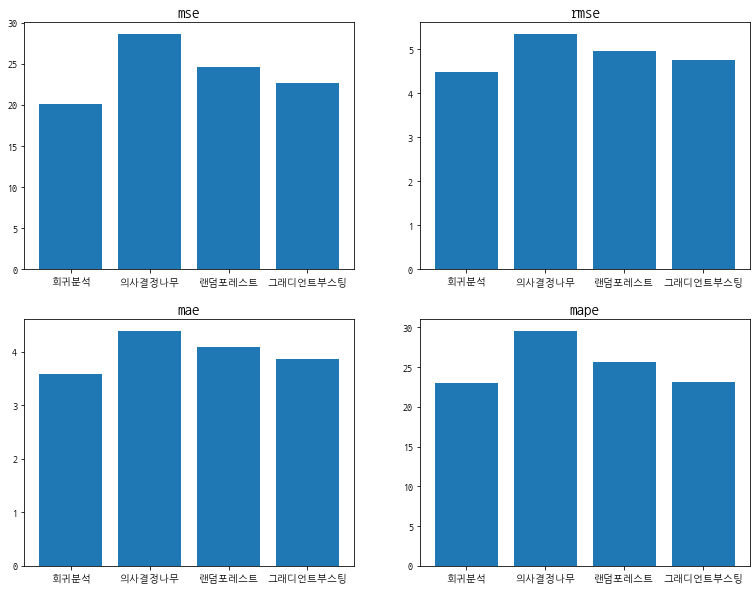

In [151]:
fig, ax = plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)

# 실습 - 당뇨병(MSE,RMSE,MAE,MAPE)

In [152]:
df = pd.read_csv('DIABETES.csv', engine = 'python')
df.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [153]:
df_y = df['Y']
df_x = df.drop('Y', axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)

In [154]:
#회귀모델
lr_model = smf.ols(formula = 'Y~BMI+BP+CHOLESTEROL+TCH+LTG', data= df)
lr_result = reg_model.fit()

In [155]:
#Decision Tree
tree_final = DecisionTreeRegressor(min_samples_leaf = 21, min_samples_split = 52, max_depth = 5, random_state= 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=21,
                      min_samples_split=52, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

In [156]:
#RandomForest
rf_final = RandomForestRegressor(n_estimators = 120, min_samples_leaf = 15, min_samples_split = 30, max_depth = 3, random_state= 1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=15, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=1234,
                      verbose=0, warm_start=False)

In [157]:
#GradientBoosting
gb_final = GradientBoostingRegressor(n_estimators = 27, min_samples_leaf = 3, min_samples_split = 40, max_depth = 3,
                                     learning_rate = 0.1,random_state= 1234)
gb_final.fit(df_train_x, df_train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=40,
                          min_weight_fraction_leaf=0.0, n_estimators=27,
                          n_iter_no_change=None, presort='auto',
                          random_state=1234, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [158]:
models = ["회귀분석","의사결정나무","랜덤포레스트","그래디언트부스팅"]
mse, rmse, mae, mape = [],[],[],[]

lr_y_pred = lr_result.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,lr_y_pred))
rmse.append(root_mean_squared_error(df_test_y,lr_y_pred))
mae.append(mean_absolute_error(df_test_y,lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,lr_y_pred))

dt_y_pred = tree_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

rf_y_pred = rf_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

gb_y_pred = gb_final.predict(df_test_x)

mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

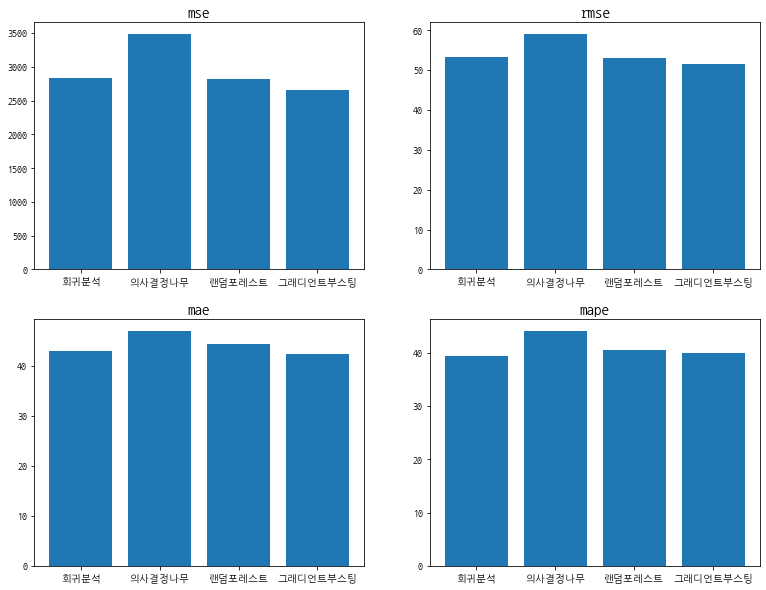

In [159]:
fig, ax = plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)

# 주성분분석(PCA)

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [161]:
df = pd.read_csv('직무능력평가.csv', engine = 'python')
df.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [162]:
df_x = df.drop('EVAL', axis = 1)
df_y = df['EVAL']

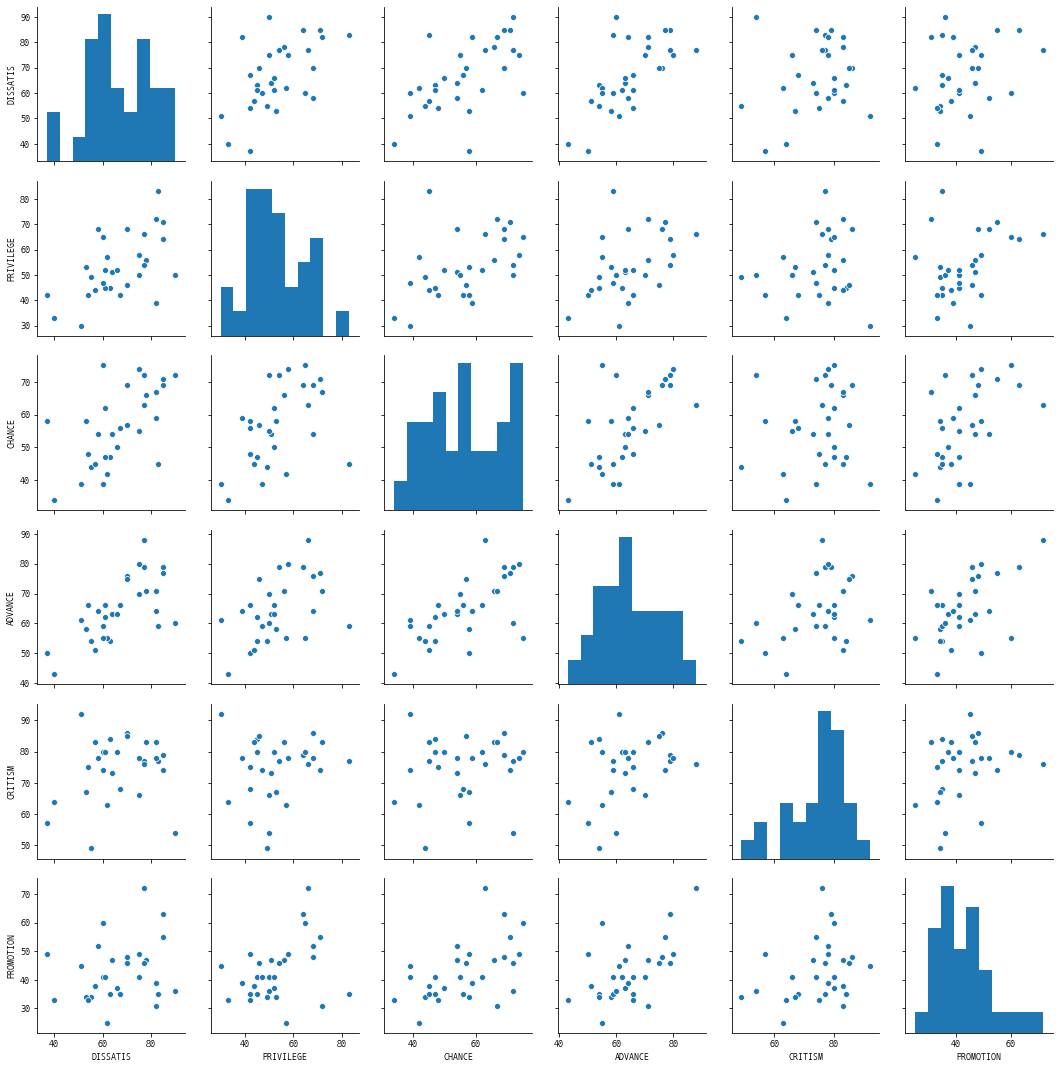

In [163]:
sns.pairplot(df_x)

In [164]:
df_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [165]:
df_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [167]:
x_cols = df_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_x)

print("Scaled Data:\n{}".format(nd_scaled[:5].round(3)))
print("Shape:\n{}".format(nd_scaled.shape))

Scaled Data:
[[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape:
(30, 6)


In [168]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [170]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [173]:
pca = PCA(n_components=6)
nd_pca = pca.fit_transform(df_scaled)

print("PCA Data:\n{}".format(nd_pca[:5]))
print("Shape:\n{}".format(nd_pca.shape))

PCA Data:
[[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape:
(30, 6)


In [174]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [175]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,7)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


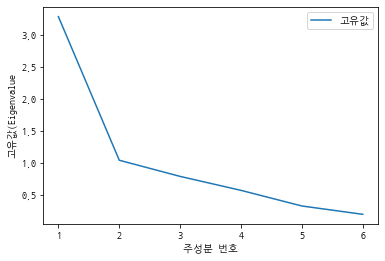

In [178]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = "고유값")

plt.ylabel("고유값(Eigenvalue")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

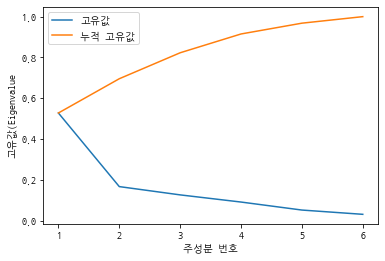

In [180]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'], label = "고유값")
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label = "누적 고유값")
plt.ylabel("고유값(Eigenvalue")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

In [181]:
x_cols = pd.DataFrame({"Feature":df_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,
                                                columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


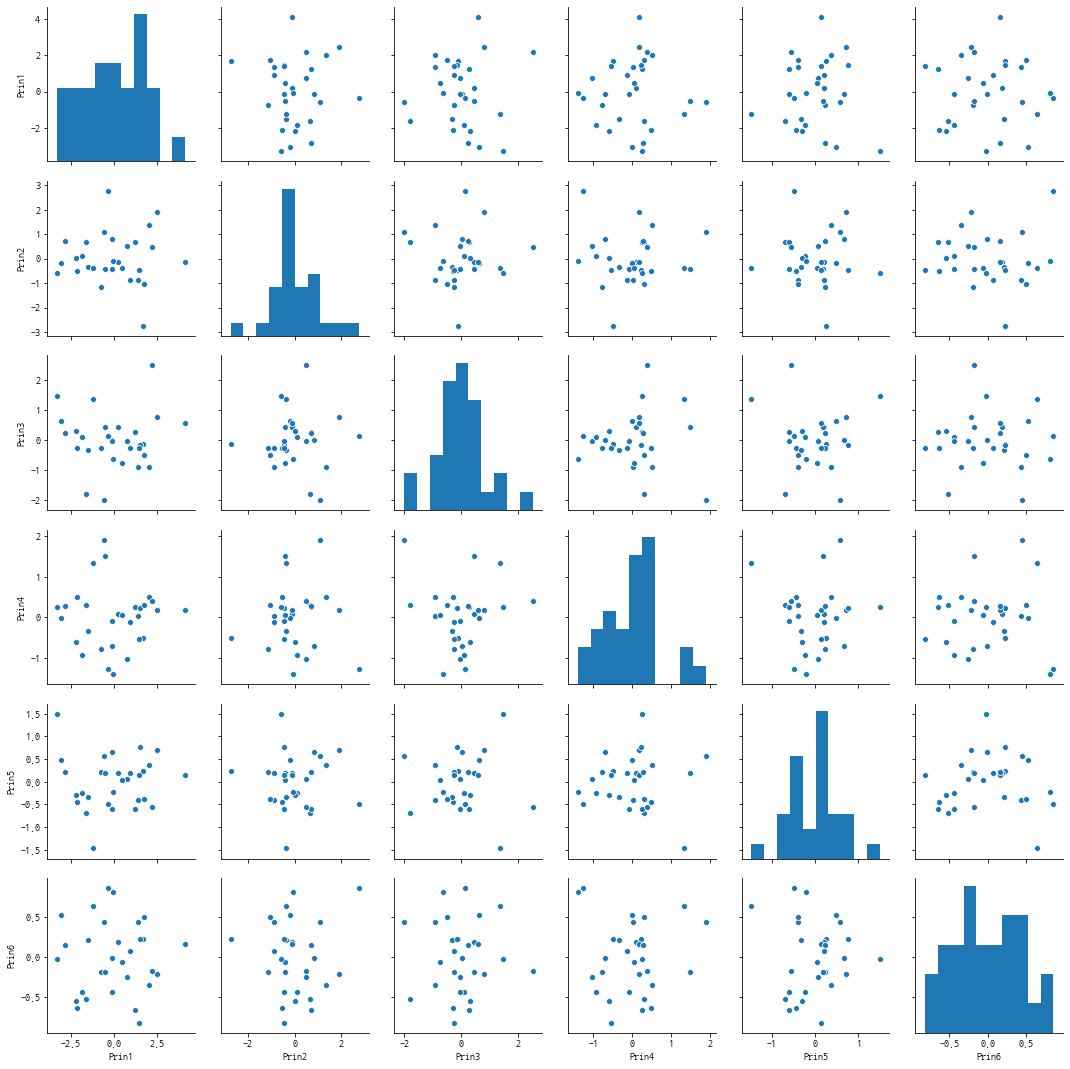

In [182]:
sns.pairplot(df_pca)

In [183]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,-0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,-0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,-0.0,-0.0
Prin5,-0.0,-0.0,0.0,-0.0,1.0,-0.0
Prin6,0.0,0.0,-0.0,-0.0,-0.0,1.0


In [184]:
df_x_const = sm.add_constant(df_x)
reg_model = sm.OLS(df_y,df_x_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.24e-05
Time:                        15:44:55   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

/home/pirl/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [187]:
df_scaled_const = sm.add_constant(df_scaled)
scaled_reg_model = sm.OLS(df_y, df_scaled_const)
scaled_reg_model = scaled_reg_model.fit()
print(scaled_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.24e-05
Time:                        15:46:58   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.290     50.087      0.0

In [188]:
x_var = ['Prin1','Prin2','Prin3']

df_pca_const = sm.add_constant(df_pca[x_var])

reg_model = sm.OLS(df_y, df_pca_const)
reg_model = reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Thu, 06 Feb 2020   Prob (F-statistic):           1.02e-05
Time:                        15:49:11   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

In [189]:
df = pd.read_csv('IRIS.csv', engine = 'python')
df.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [190]:
df_x = df.drop('SPECIES', axis = 1)
df_y = df['SPECIES']

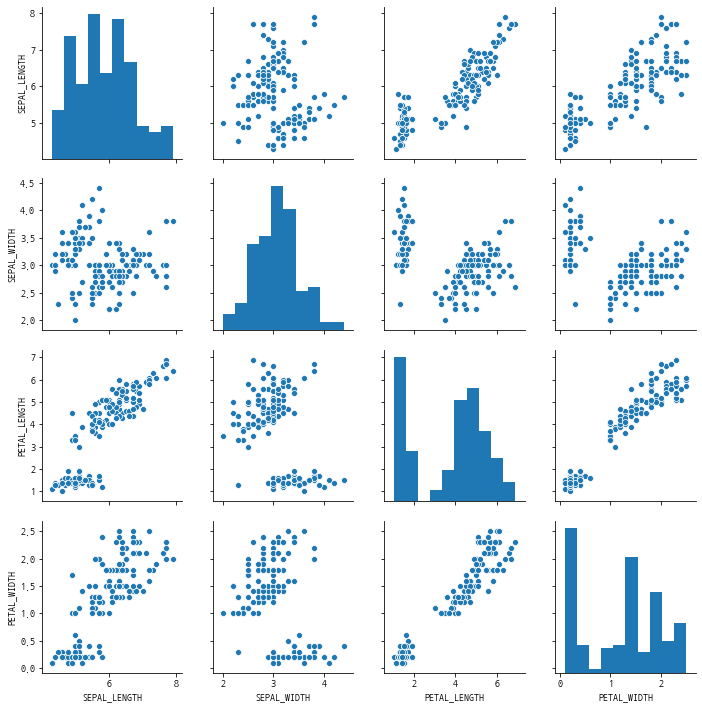

In [191]:
sns.pairplot(df_x)

In [192]:
df_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [193]:
x_cols = df_x.columns
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_x)

print("Scaled Data:\n{}".format(nd_scaled[:5].round(3)))
print("Shape:\n{}".format(nd_scaled.shape))

Scaled Data:
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape:
(150, 4)


In [194]:
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [196]:
pca = PCA(n_components=4)
nd_pca = pca.fit_transform(df_scaled)

print("PCA Data:\n{}".format(nd_pca[:5]))
print("Shape:\n{}".format(nd_pca.shape))

PCA Data:
[[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Shape:
(150, 4)


In [197]:
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1","Prin2","Prin3","Prin4"])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [198]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,5)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValueRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


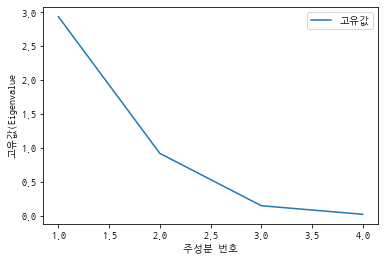

In [199]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = "고유값")

plt.ylabel("고유값(Eigenvalue")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

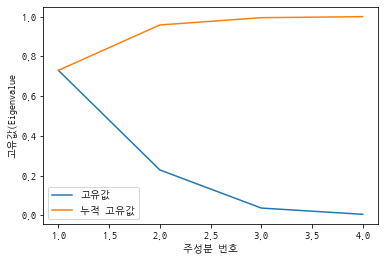

In [200]:
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'], label = "고유값")
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label = "누적 고유값")
plt.ylabel("고유값(Eigenvalue")
plt.xlabel("주성분 번호")
plt.legend(loc = "best")

In [201]:
x_cols = pd.DataFrame({"Feature":df_x.columns})
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_.T*-1,
                                                columns = ["Prin1","Prin2","Prin3","Prin4"])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


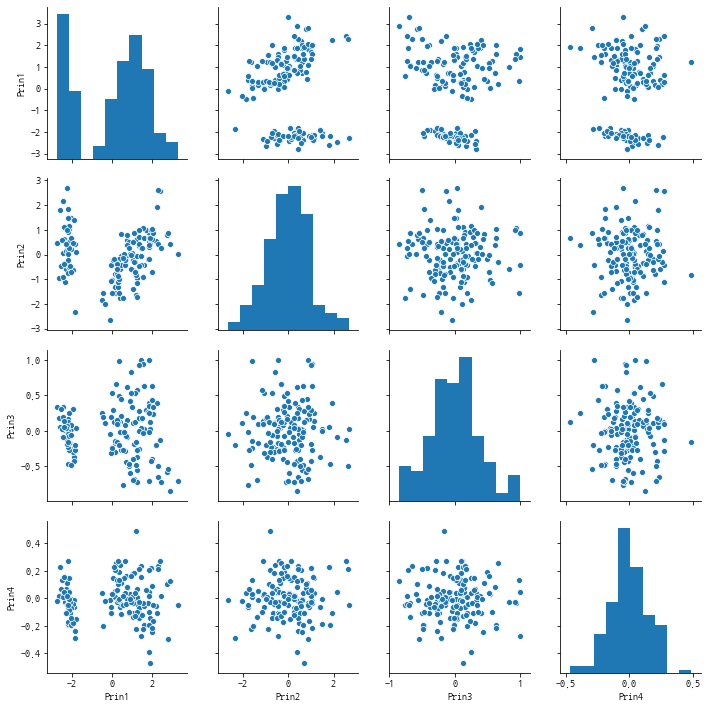

In [202]:
sns.pairplot(df_pca)